# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [1]:
import math

def compareSlope(p1, p2, p3):
    x1, y1, x2, y2, x3, y3 = p1[0], p1[1], p2[0], p2[1], p3[0], p3[1]

    s = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)

    if s > 0:
        return 1      #counterclockwise
    elif s < 0:
        return -1     #clockwise
    else:
        return 0      #collinear

def dist(p1,p2):
    x1,y1,x2,y2 = p1[0], p1[1], p2[0], p2[1]
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)


def jarvisMarch(inputSet):

    if len(inputSet) < 3:
        return "Convex hull not possible with less than 3 points"

    # Find lowest x-coordinate as start point
    on_hull = min(inputSet, key=lambda coord: coord[0])
    outputSet = []

    while True:
        outputSet.append(on_hull)
        next_point = inputSet[0]
        for point in inputSet:
            x = compareSlope(on_hull, next_point, point)
            if next_point == on_hull or x == 1 or (x == 0 and dist(on_hull, point) > dist(on_hull, next_point)):
                next_point = point
        on_hull = next_point
        if on_hull == outputSet[0]:
            break

    return outputSet

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [2]:
import math

def calculateAngle(pointA, pointB):
    return math.atan2(pointB[1] - pointA[1], pointB[0] - pointA[0])

def calculateDistance(pointA, pointB):
    return ((pointB[0] - pointA[0]) ** 2 + (pointB[1] - pointA[1]) ** 2) ** 0.5

def calculateOrientation(pointA, pointB, pointC):
    return (pointB[0] - pointA[0]) * (pointC[1] - pointA[1]) - (pointB[1] - pointA[1]) * (pointC[0] - pointA[0])

def mergeSort(arr, startPoint):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    leftHalf = mergeSort(arr[:mid], startPoint)
    rightHalf = mergeSort(arr[mid:], startPoint)

    return merge(leftHalf, rightHalf, startPoint)

def merge(left, right, startPoint):
    result = []
    leftIndex = rightIndex = 0

    while leftIndex < len(left) and rightIndex < len(right):
        if (calculateAngle(startPoint, left[leftIndex]), calculateDistance(startPoint, left[leftIndex])) < \
           (calculateAngle(startPoint, right[rightIndex]), calculateDistance(startPoint, right[rightIndex])):
            result.append(left[leftIndex])
            leftIndex += 1
        else:
            result.append(right[rightIndex])
            rightIndex += 1

    result.extend(left[leftIndex:])
    result.extend(right[rightIndex:])
    return result

def quickSort(arr, startPoint):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    left = [point for point in arr if (calculateAngle(startPoint, point), calculateDistance(startPoint, point)) < \
                                       (calculateAngle(startPoint, pivot), calculateDistance(startPoint, pivot))]
    middle = [point for point in arr if (calculateAngle(startPoint, point), calculateDistance(startPoint, point)) == \
                                         (calculateAngle(startPoint, pivot), calculateDistance(startPoint, pivot))]
    right = [point for point in arr if (calculateAngle(startPoint, point), calculateDistance(startPoint, point)) > \
                                        (calculateAngle(startPoint, pivot), calculateDistance(startPoint, pivot))]

    return quickSort(left, startPoint) + middle + quickSort(right, startPoint)

def pythonSort(arr, startPoint):
    arr.sort(key=lambda thisPoint: (calculateAngle(startPoint, thisPoint), calculateDistance(startPoint, thisPoint)))
    return arr

def grahamScan(inputSet, method=pythonSort):
    inputSet = inputSet.copy()  # To ensure the algorithm doesn't alter the inputSet
    startPoint = min(inputSet, key=lambda num: (num[1], num[0]))      # Find the bottom point
    inputSet.pop(inputSet.index(startPoint))
    inputSet = method(inputSet, startPoint)    # To sort the points by their angle and their distance from the starting points

    if len(inputSet) < 3:
        return inputSet

    outputSet = [startPoint, inputSet[0]]
    for point in inputSet[1:]:
        while len(outputSet) > 1 and calculateOrientation(outputSet[-2], outputSet[-1], point) <= 0:
            outputSet.pop()
        outputSet.append(point)

    return outputSet

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [3]:
TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

def dist(p1,p2):
    x1,y1,x2,y2 = p1[0], p1[1], p2[0], p2[1]
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def turn(p, q, r):
    """Returns -1, 0, 1 if p,q,r forms a right, straight, or left turn."""
    value = (q[0] - p[0]) * (r[1] - p[1]) - (r[0] - p[0]) * (q[1] - p[1])
    return (value > 0) - (value < 0)

def rTangent(hull, p):
    """Return the index of the point in hull that the right tangent line from p
    to hull touches.
    """
    if len(hull) == 1:
        return 0
    l, r = 0, len(hull)-1
    l_prev = turn(p, hull[0], hull[-1])
    l_next = turn(p, hull[0], hull[(l + 1) % r])

    while l < r:
        c = (l + r) // 2
        c_prev = turn(p, hull[c], hull[(c - 1) % len(hull)])
        c_next = turn(p, hull[c], hull[(c + 1) % len(hull)])
        c_side = turn(p, hull[l], hull[c])

        if c_prev != TURN_RIGHT and c_next != TURN_RIGHT:
            return c
        elif c_side == TURN_LEFT and (l_next == TURN_RIGHT or l_prev == l_next) or \
                c_side == TURN_RIGHT and c_prev == TURN_RIGHT:
            r = c               # Tangent touches left chain
        else:
            l = c + 1           # Tangent touches right chain
            l_prev = -c_next    # Switch sides
            l_next = turn(p, hull[l], hull[(l + 1) % len(hull)])
    return l

def minHullpt(hulls):
    # Return bottommost point
    minY = None
    hullpt = None

    for i, points in enumerate(hulls):
        for j, (x, y) in enumerate(points):
            if minY is None or y < minY:
                minY = y
                hullpt = (i, j)

    return hullpt

def partialChan(inputSet, m):
    chunks = [inputSet[i:i + m] for i in range(0, len(inputSet), m)] #dividing points to chunks
    hulls = [grahamScan(chunk) for chunk in chunks] # creating small hulls and appending to list

    p1 = minHullpt(hulls) #first point on hull
    outputSet = [p1]

    for _ in range(m + 1):
        p1 = outputSet[-1]
        p = hulls[p1[0]][p1[1]]
        other_hulls = [i for i in range(len(hulls)) if i != p1[0]]
        next = (p1[0], (p1[1] + 1) % len(hulls[p1[0]]))

        for hull in other_hulls:
            s = rTangent(hulls[hull], p)
            q, r = hulls[next[0]][next[1]], hulls[hull][s]
            t = turn(p, q, r)

            if t == TURN_RIGHT or t == TURN_NONE and dist(p, r) > dist(p, q):
                next = (hull, s)
        if next == outputSet[0]:
            hullpoints = [hulls[h][i] for h, i in outputSet] #converting lists of indices to point coordinates
            #print(f"h = {len(hullpoints)}")
            return hullpoints
        outputSet.append(next)
    return None

def chan(inputSet):
    for t in range(8): # 8 is an arbitrary number but it should never need to be bigger
      m = min(2**(2**t), len(inputSet))
      #print(f"m is {m}")
      outputSet = partialChan(inputSet, m)

      if outputSet is not None:
          return outputSet

#The implementation of turn(), rTangent() and partialChan()are mostly copied and modified from https://gist.github.com/tixxit/252229

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [4]:
import random

class TestDataGenerator():

    def __init__(self):
        self.maxInt = 32767
        pass

    def getRandData(self, n):
        #Generate completely random data within a square of size 32767x32767 (specified range)
        allPoints = []
        while len(allPoints) < n:
            temp = (random.randint(0, self.maxInt), random.randint(0, self.maxInt))
            if temp not in allPoints:
                allPoints.append(temp)
        return allPoints

    def getNHData(self, n):
        # Generate points on the convex hull in counterclockwise order, so that n = h
        diameter = self.maxInt
        angleStep = 2 * math.pi / n
        hullPoints = [(round(diameter * math.cos(i * angleStep)), round(diameter * math.sin(i * angleStep))) for i in range(n)]

        return hullPoints

    def getChanData(self, n, h):
        """
        Generate points on the convex hull like getNHData(), but introducing random points
        within the hull such that h is controlled
        """

        diameter = self.maxInt
        distance = 50 # introduce distance between border and rest of the points, to avoid points being rounded to the hull
        circlePoints = []

        for _ in range(n - h):
            # Generate random points within the circle with a slight distance from the border
            radius = random.uniform(distance, diameter - distance)
            angle = random.uniform(0, 2 * math.pi)
            x = round(radius * math.cos(angle))
            y = round(radius * math.sin(angle))
            circlePoints.append((x, y))

        # Add points on the convex hull
        angleStep = 2 * math.pi / h
        hullPoints = [(round(diameter * math.cos(i * angleStep)), round(diameter * math.sin(i * angleStep))) for i in range(h)]

        # Combine points inside the circle and on the convex hull
        allPoints = circlePoints + hullPoints
        allPoints = [(round(x), round(y)) for x, y in allPoints]

        return allPoints

Use the cell below to implement the requested **experimental framework** API.

In [7]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():

    def __init__(self):
        pass

    def measureTime(self, algorithm, data, m=None):
        timeA = timeit.default_timer() * 1000

        if m is not None:
            algorithm(data, m) #for running partialChan()
        else:
            algorithm(data)

        timeB = timeit.default_timer() * 1000
        return (timeB - timeA)

    def formatNShow(self):
        plt.ylabel("Time (milliseconds)")
        plt.xlabel("Number of points (n)")
        plt.legend()
        plt.show()
        print("----------------------------------------------------------------------------------------------")

    def formatNShow2(self):
        plt.ylabel("Time (milliseconds)")
        plt.xlabel("Number of times (n)")
        plt.legend()
        plt.show()
        print("----------------------------------------------------------------------------------------------")

    def runAvgTest(self, numTest):
        step = 500
        repeatNum = 4
        dataGen = TestDataGenerator()
        numData = []
        timeJ, timeG, timeC, timePC = [], [], [], []

        for numPoints in range(100, numTest * step, step): #numPoints are x-axis of the graph
            numData.append(numPoints)

            for _ in range(repeatNum): #for the same numPoints, generate different datasets of points for a better average case when measuring time
                avgTestData = dataGen.getRandData(numPoints)
                t1,t2,t3,t4 = 0,0,0,0 #total time

                t1 += self.measureTime(jarvisMarch, avgTestData)
                t2 += self.measureTime(grahamScan, avgTestData)
                t3 += self.measureTime(chan, avgTestData)
                t4 += self.measureTime(partialChan, avgTestData, round(numPoints))

            timeJ.append(t1/repeatNum)
            timeG.append(t2/repeatNum)
            timeC.append(t3/repeatNum)
            timePC.append(t4/repeatNum)


        plt.plot(numData, timeJ, 'b', marker='.', markerfacecolor='k', label="Jarvis March Algorithm")
        plt.plot(numData, timeG, 'r', marker='.', markerfacecolor='k', label = "Graham Scan Algorithm")
        plt.plot(numData, timeC, 'g', marker='.', markerfacecolor='k', label = "Chan's Algorithm")
        plt.plot(numData, timePC, 'c', marker='.', markerfacecolor='k', label = "partialChan's Algorithm") #this is the worst case for chan's
        plt.title("Average Case")
        self.formatNShow()

    def runGSTest(self, numTest): #Graham Scan Test
        step = 500
        dataGen = TestDataGenerator()
        repeatNum = 4
        numData = []
        mergeTime, quickTime, pythonTime = [], [], []

        for numPoints in range(100, numTest * step, step): #numPoints are x-axis of the graph
            avgTestData = dataGen.getRandData(numPoints)
            numData.append(numPoints)

            mergeTime.append(self.measureTime(grahamScan, avgTestData, mergeSort))
            quickTime.append(self.measureTime(grahamScan, avgTestData, quickSort))
            pythonTime.append(self.measureTime(grahamScan, avgTestData, pythonSort))

        plt.plot(numData, mergeTime, 'r', marker='.', markerfacecolor='k', label="Merge Sort")
        plt.plot(numData, quickTime, 'g', marker='.', markerfacecolor='k', label="Quick Sort")
        plt.plot(numData, pythonTime, 'b', marker='.', markerfacecolor='k', label="Python Built-in Sort")
        plt.title("Performance of Different Sorting Algorithms for Graham Scan Algorithm")
        self.formatNShow()


    def runNHTest(self, numTest): #n=h Test
        step = 30
        dataGen = TestDataGenerator()
        numData = []
        timeJ, timeG, timeC = [], [], []
        for numPoints in range(10, numTest * step, step):
            NHTestData = dataGen.getNHData(numPoints)
            numData.append(numPoints)

            timeJ.append(self.measureTime(jarvisMarch, NHTestData))
            timeG.append(self.measureTime(grahamScan, NHTestData))
            timeC.append(self.measureTime(chan, NHTestData))

        plt.plot(numData, timeJ, 'b', marker='.', markerfacecolor='k', label = "Jarvis March Algorithm")
        plt.plot(numData, timeG, 'r', marker='.', markerfacecolor='k', label = "Graham Scan Algorithm")
        plt.plot(numData, timeC, 'g', marker='.', markerfacecolor='k', label = "Chan's Algorithm")
        plt.title("n=h test")
        self.formatNShow()

    def runChanTest(self, numTest):
        step = 500
        dataGen = TestDataGenerator()
        numData = []
        timeG, timePC = [], []

        for numPoints in range(100, numTest * step, step):
            numData.append(numPoints)
            chanTestData = dataGen.getChanData(numPoints, 100)

            timeG.append(self.measureTime(grahamScan, chanTestData))
            timePC.append(self.measureTime(partialChan, chanTestData, 100)) #100 being m for partialHull()

        plt.plot(numData, timeG, 'r', marker='.', markerfacecolor='k', label = "Graham Scan Algorithm")
        plt.plot(numData, timePC, 'c', marker='.', markerfacecolor='k', label = "partialChan's Algorithm")
        plt.title("Chan's test(h=100)")
        self.formatNShow()

    def runJMTest(self, numTest):   # Jarvis March test
        step = 30
        dataGen = TestDataGenerator()
        numData = []
        timeJA, timeJW = [], []
        for numPoints in range(10, numTest * step, step):
            NHTestData = dataGen.getNHData(numPoints)
            randTestData = dataGen.getRandData(numPoints)
            numData.append(numPoints)

            timeJW.append(self.measureTime(jarvisMarch, NHTestData))
            timeJA.append(self.measureTime(jarvisMarch, randTestData))

        plt.plot(numData, timeJW, 'b', marker='.', markerfacecolor='k', label = "Worst Case")
        plt.plot(numData, timeJA, 'r', marker='.', markerfacecolor='k', label = "Average Case")
        plt.title("Jarvis March Algorithm")
        self.formatNShow()


    def runStbTest(self, numTest):  # Stability Test
        dataGen = TestDataGenerator()
        numPoints = 1000
        stbJ, stbG, stbC, numStbData = [], [], [], []
        for i in range(numTest):
            testData = dataGen.getRandData(numPoints)
            numStbData.append(numPoints)

            stbJ.append(self.measureTime(jarvisMarch, testData))
            stbG.append(self.measureTime(grahamScan, testData))
            stbC.append(self.measureTime(chan, testData))

        plt.plot([i for i in range(1, numTest + 1)], stbJ, 'r', marker='.', markerfacecolor='k', label="Jarvis March")
        plt.title("Stability of Jarvis March Algorithm")
        self.formatNShow2()

        plt.plot([i for i in range(1, numTest + 1)], stbG, 'r', marker='.', markerfacecolor='k', label="Graham Scan")
        plt.title("Stability of Graham Scan Algorithm")
        self.formatNShow2()

        plt.plot([i for i in range(1, numTest + 1)], stbC, 'r', marker='.', markerfacecolor='k', label="Chan's Algorithm")
        plt.title("Stability of Chan's Algorithm")
        self.formatNShow2()



Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

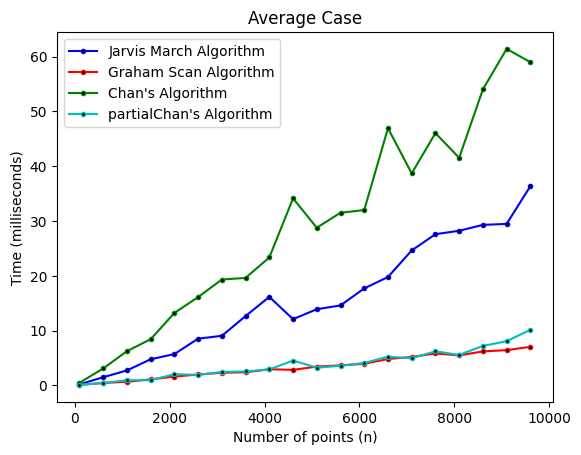

----------------------------------------------------------------------------------------------


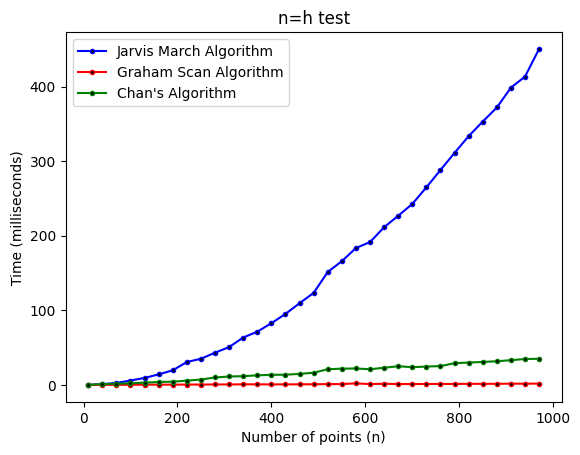

----------------------------------------------------------------------------------------------


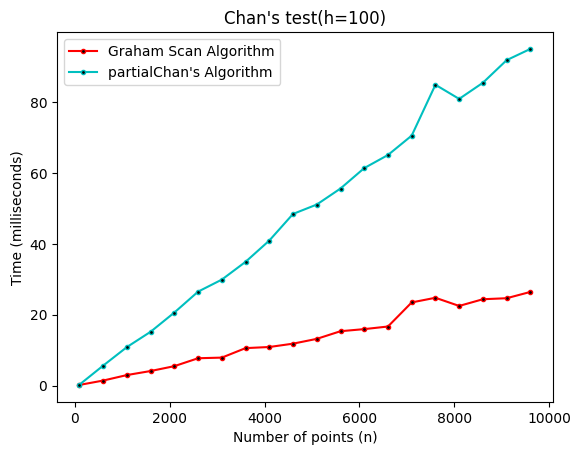

----------------------------------------------------------------------------------------------


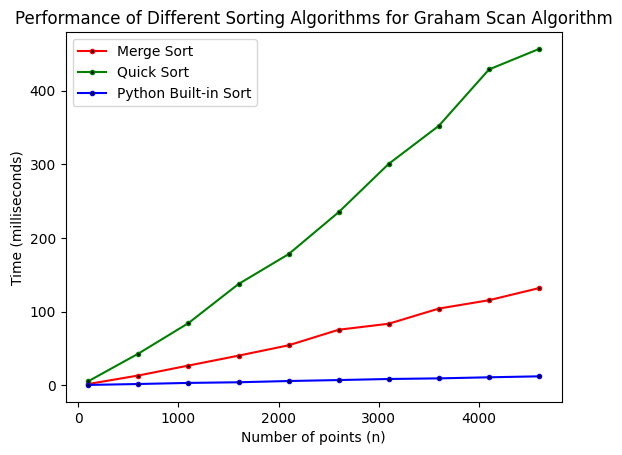

----------------------------------------------------------------------------------------------


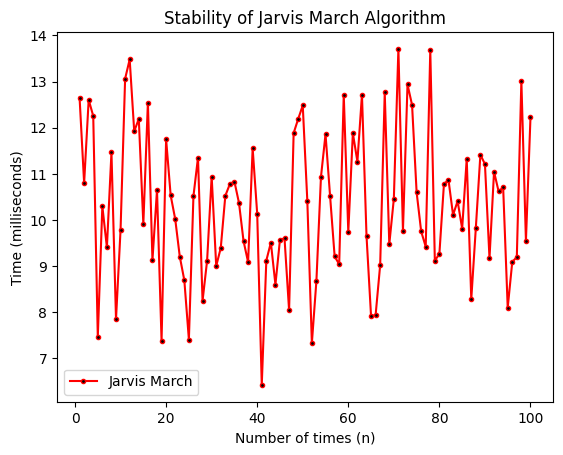

----------------------------------------------------------------------------------------------


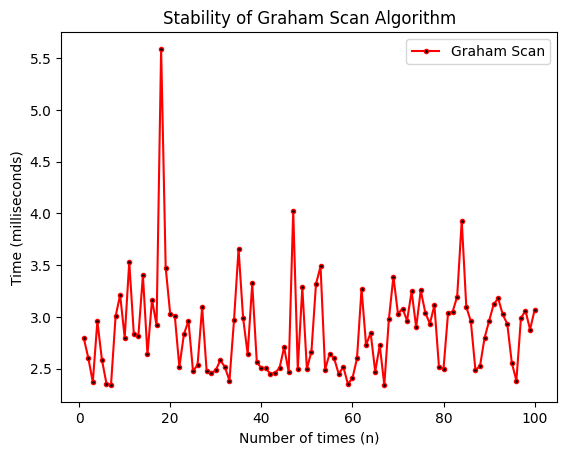

----------------------------------------------------------------------------------------------


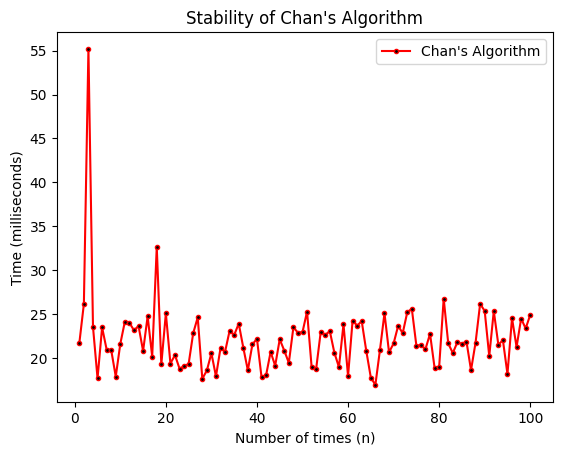

----------------------------------------------------------------------------------------------


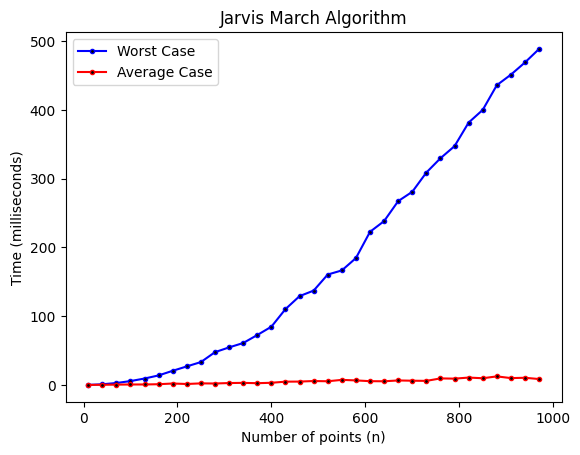

----------------------------------------------------------------------------------------------


In [8]:
# ADD YOUR TEST CODE HERE
numOfAvgTest = 20
numOfNHTest = 33 # Cannot be over 33, or else it becomes too unstable
numOfChanTest = 20
numOfGSTest = 10
numOfStbTest = 100

tester = ExperimentalFramework()

tester.runAvgTest(numOfAvgTest)
tester.runNHTest(numOfNHTest)
tester.runChanTest(numOfChanTest)
tester.runGSTest(numOfGSTest)
tester.runStbTest(numOfStbTest)
tester.runJMTest(numOfNHTest)


